In [1]:
import wave
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [2]:
washing_machine_wave = wave.open('audio/washingmachine.wav','r')

In [3]:
washing_machine_wave.getparams()

(2, 2, 44100, 383787, 'NONE', 'not compressed')

In [4]:
signal_1_raw = washing_machine_wave.readframes(-1)
signal_1 = np.fromstring(signal_1_raw, dtype=np.int32)

# The audio recordings have quite a low volume.
# Lets increase the volume by a factor of 4.
signal_1 *= 4

In [5]:
'length: ', len(signal_1) , 'first 100 elements: ', signal_1[:100]

('length: ',
 383787,
 'first 100 elements: ',
 array([ 66847740,  83625212,  68682776,  58459004,  60556188,  52167452,
         49545972,  51905304,  49021676,  45613752,  47710936,  47710936,
         50332416,  58459004,  66585592,  75498624,  85984544,  94635428,
        103810608, 114296528, 120063784, 121374524, 122947412, 120850228,
        114296528, 107218532, 102237720,  98829796,  96732612,  95946168,
         98829796, 104334904, 108791420, 113247936, 117966600, 120325932,
        120063784, 119015192, 116918008, 112461492, 107218532, 102237720,
         97256908,  91227504,  86508840,  84935952,  85198100,  84411656,
         79430844,  70779960,  63177668,  56361820,  47710936,  38535756,
         31719908,  28311984,  29884872,  37487164,  46662344,  55051080,
         63177668,  68944924,  70779960,  68420628,  63701964,  56623968,
         45875900,  34341388,  25690504,  20185396,  15728880,  14155992,
         16777472,  20447544,  23855468,  26739096,  27525540,  2

In [6]:
music_wave = wave.open('audio/music.wav','r')

# Extract Raw Audio from WAV file.
signal_raw_2 = music_wave.readframes(-1)
signal_2 = np.fromstring(signal_raw_2, dtype=np.int32)

# Increase volume
signal_2 *= 4

# Make length same as signal 1.
signal_2_start = 42500
signal_2_end = len(signal_1) + signal_2_start
signal_2 = signal_2[signal_2_start:signal_2_end]

print('Length of signal 2: ', len(signal_2))

('Length of signal 2: ', 383787)


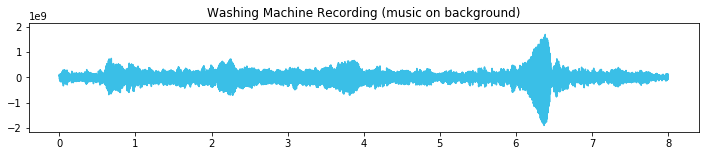

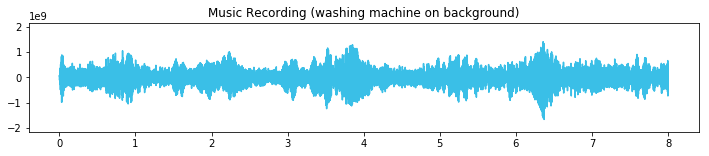

In [7]:
# Plot both waveforms.
fs = washing_machine_wave.getframerate()
timing = np.linspace(0, len(signal_1)/fs, num=len(signal_1))

plt.figure(figsize=(12,2))
plt.title('Washing Machine Recording (music on background)')
plt.plot(timing, signal_1, c="#3ABFE7")
plt.ylim(np.iinfo(np.int32).min, np.iinfo(np.int32).max)
plt.show()

plt.figure(figsize=(12,2))
plt.title('Music Recording (washing machine on background)')
plt.plot(timing,signal_2, c="#3ABFE7")
plt.ylim(np.iinfo(np.int32).min, np.iinfo(np.int32).max)
plt.show()

In [8]:
X = list(zip(signal_1, signal_2))

# Let's peak at what X looks like
X[:10]

[(66847740, 67372036),
 (83625212, 67372036),
 (68682776, 69207072),
 (58459004, 71042108),
 (60556188, 73401440),
 (52167452, 76022920),
 (49545972, 78120104),
 (51905304, 78644400),
 (49021676, 77595808),
 (45613752, 74712180)]

In [9]:
# TODO: Import FastICA
from sklearn.decomposition import FastICA

# TODO: Initialize FastICA with n_components=3
fast_ica = FastICA(n_components=2)

# TODO: Run the FastICA algorithm using fit_transform on dataset X
ica_result = fast_ica.fit_transform(X)

In [10]:
ica_result.shape

(383787, 2)

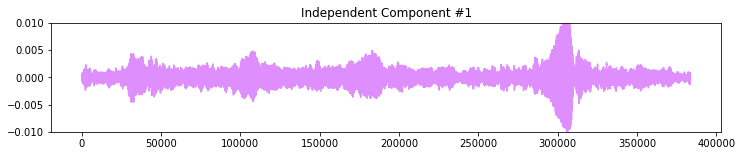

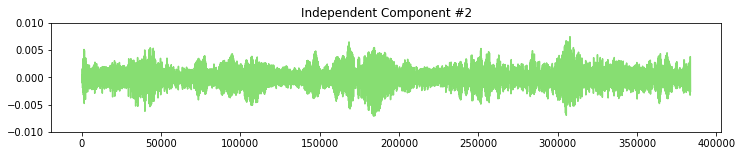

In [11]:
result_signal_1 = ica_result[:,0]
result_signal_2 = ica_result[:,1]

plt.figure(figsize=(12,2))
plt.title('Independent Component #1')
plt.plot(result_signal_1, c="#df8efd")
plt.ylim(-0.010, 0.010)
plt.show()

# Plot Independent Component #2
plt.figure(figsize=(12,2))
plt.title('Independent Component #2')
plt.plot(result_signal_2, c="#87de72")
plt.ylim(-0.010, 0.010)
plt.show()


In [12]:
# The audio samples have quite a low volume.
# Lets increase both so we can have a better comparison.
washingmachine_increased = np.int32(signal_1*1.5)
music_increased = np.int32(signal_2*1.5)

wavfile.write("results/washingmachine_increased.wav", fs, washingmachine_increased)
wavfile.write("results/music_increased.wav", fs, music_increased)

# Compute the final result signal after ICA.
result_signal_1_int = np.int32(result_signal_1*np.iinfo(np.int32).max*100)
result_signal_2_int = np.int32(result_signal_2*np.iinfo(np.int32).max*100)

wavfile.write("results/result_signal_1.wav", fs, result_signal_1_int)
wavfile.write("results/result_signal_2.wav", fs, result_signal_2_int)